In [ ]:
!pip install llama-index-llms-groq
!pip install pdfplumber
!pip install rouge-score


In [ ]:
from llama_index.llms.groq import Groq
from rouge_score import rouge_scorer
import numpy as np


In [ ]:
api_key = "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"  # Replace with your actual API key
llm = Groq(model="llama3-70b-8192", api_key=api_key)


In [ ]:
input_text = """
I love these cookies!  Not only are they healthy but they taste great and are so soft!  I will definitely add these to my grocery list! "Quaker Soft Baked Oatmeal Cookies with raisins are a delicious treat, great for anytime of day.  For example:<br /><br />--at breakfast, I had one with a large banana and a cup of coffee, and felt I'd had a relatively ""healthy"" start to the day.<br /><br />--the next day at lunch, following a tuna sandwich, I had one with a glass of milk, and was satisfied enough to not need a snack before dinner at 6:30.<br /><br />--the following night, after dinner, I had one with the remainder of my glass of wine. (Delicious!) And again, didn't feel the need to snack later in the evening.<br /><br />Each cookie is individually packaged, and their texture is soft and moist, with just the right amount of sweetness. Natural flavors used in the making are Cinnamon and All Spice.  These flavorings give the cookies a real old-fashioned, homemade taste.<br /><br />Nutritionally, the cookies have 170 calories each, 1.5g saturated fat, 150 mg sodium, and 12g sugar. They also have 2g of protein, and contain 25g of fiber.<br /><br />While the calorie count may seem a bit high for one cookie, they are good sized, and 1 cookie per serving is certainly enough to satisfy.<br /><br />Because of their great taste and texture, kids will probably enjoy them also.<br /><br />If you like oatmeal raisin cookies, give these a try!"
I am usually not a huge fan of oatmeal cookies, but these literally melt in your mouth. They are so soft and tasty! I would definitely recommend these to someone who loves oatmeal, and even those like me who would probably pick a different flavor over this one.
"I participated in a product review that included a sample of <a href=""http://www.amazon.com/gp/product/B007JFMH8M"">Quaker Soft Baked Oatmeal Cookie, Raisins, 8.8-Ounce (Pack of 12)</a>.  Okay first of all I love Oatmeal Raisin cookies and this one was no exception.  It was great!!! Soft n chewy, nice portion size and and as always a high quality product from Quaker Oats.  Thanks to Quaker and Influenster to for including this in their Mom Voxbox.  If you haven't tried it you need to and make sure to share it with the family."
My kids loved these. I was very pleased to give my kids a quick on the go healthy snack before soccer and acne practice. They loved the flavor, I loved that its healthy.
I really enjoyed these individually wrapped big oatmeal cookies. They are really soft and chewy. You can buy different flavors. I will definately be repurchasing these cookies in the future. They are delicious and super healthy too.
I was surprised at how soft the cookie was. I usually buy Little Debbie's cookies, and I noticed the Quaker Soft Baked Oatmeal Cookie was bigger and had a bold taste.
Filled with oats and raisins you'll love this snack ..... Delicious and nutritious ..... what else is there to say.... you can't beat that....
"I was recently given a complimentary ""vox box"" from influenster, call the mom vox box. It came with various products in it for me to try out and review the products inside. One of the products i received was a Quaker soft baked oatmeal cookie ""raisins"" flavor. When i opened the cookie wrapper, i gave half of it to my 3 year old and i ate the other half. I was immediately surprised by how soft the cookie was when i was splitting it in half. It was like a really really good home baked cookie. Soft, chewy and tasty. I normally do not like oatmeal raisin cookies, due to the raisins, but this cookie was surprisingly yummy. My three year old loved it so much that we had to go out and buy our own box. The cookies are soft, chewy, yummy, and healthier than other kinds of cookies, so  i would definitely recommend this product to people that have kids for a healthy yummy substitute to other sweets"
the best and freshest cookie that comes in a package, we ate them up, wishing we had more. soo good
I am a huge fan of the Quaker Chewy cookies! The moist cookies are satisfying and not too sweet. The high quality ingredients are a crowd pleaser. A must have for any car trip! After one cookie I was hooked. Highly recommend!
yummy and delicious. i love eating it when it when its warm. the best store bought cookies! cant wait to buy more!
"I received a Quaker Oatmeal Soft Baked Oatmeal Raisin cookie to try/eat for free from Influenster [...]). I shared the cookie with my kids, and we gobbled up the cookie faster than you can say ""Quaker Oatmeal Soft Baked Cookies."" It was soft (as advertised) and included a sufficient amount of raisins to make me happy (I like raisins). It was soft without being crumbly, moist, and not too dense (some oatmeal cookies are pretty dense). I highly recommend this cookie to anyone thinking of trying it for the first time:)"
These cookies were so good. Can't wait to go out and buy some more! A good snack when you don't want to over-indulge yourself
I received these in my MomVox box from influenster! I loved it! Oatmeal cookies are my favorite and these are by far the best store bought brand I have tasted! I recommend these to anyone with a sweet tooth trying to stay healthy.
Quaker Soft Baked Oatmeal Cookies taste just like the cookies my grandma used to bake. Great to take as a quick breakfast since it is made with whole grain Quaker Oats.
These cookies are a real hit with my children! I received a sample from @Influenster in my Mom Vox Box. I enjoyed the sweetness, yet whole grain taste (which I love) and the moist raisins. This cookie would be perfect for breakfast, snack, or dessert! What could be better than that?! I love these cookies and definitely will be buying more!
I really enjoy Quaker's products and the fact that they are more healthy than most other products. These were really good especially if you like raisins.
This was the most delightful cookie i ever tasted. I was very surprised on how soft and fresh it tasted. It makes a great snack on the go as well! I tried the chocolate almond as well and YUMMY! Quaker hit  this one out of the park!
Quaker used some good ingredients in the cookie and one cookie eaten amongst four kids did not meet the nutritional panel for one cookie. Even if one cookie was eaten by them each the nutritional panel was pretty good.  So, I can be a happy mom about the children eating the cookie
My daughter stole it from me and ate it, I guess it's a good thing I can't stand oatmeal.  But both my kids are already huge fans of all things Quaker so it's easy for me to write this review.<br /><br />Quaker Soft Baked Oatmeal Cookies are chewy, nutrition and according to my kids, DELICIOUS.  They are made with Whole Grain Quaker Oats, individually packaged at $2.69 for a box of 6, is a good source of fiber, only contains 6 grams of total fat per cookie and sold pretty much EVERYWHERE!
I loved this delicious cookie! I even shared it with my 11 month old, and I'm a pretty big health nut when it comes to what I feed my daughter. It tasted great, was a great portion and it's not full of fats and sugars like all of those other cookies!
I enjoy these cookies... They taste like my grandmas homeade cookies.. Plump and super soft!!! I can't wait to try the other favors made by quacker.l
These cookies have perfect flavor, excellent moist/dry combination and are very soft. They melt in your mouth. I love the taste, I could eat box after box!
Received this through VoxBox and loved it. My son ended up with most of it, which is fine. Excellent product to keep on hand or in the diaper bag.
"I love oatmeal cookies and have made them at least hundred times.  I love my cookies, but these come in a very close second to my under baked, soft homemade ""vanishing oatmeal"" cookies.<br />There's some ingredients in these cookies that I don't find in my kitchen cabinet, but if you're not against prepackaged food, it shouldn't bother you.<br /><br />I loved the allspice taste, but my guy friend didn't that much.  I think he's just partial to my cookies.  The individual serving size is nice.  I'm more apt to just have one cookie this way rather than opening a whole box and having to eat them before they get stale.  I could say that individually wrapping the cookie saves me from just having one more and one more and..........<br /><br />They are delicious and make me feel like I'm eating something that is somewhat healthy for me.  After all, there is oatmeal in the cookie."
I love the soft bakes oatmeal raisin cookies.  The subtle taste of the oatmeal with the natural sweetness of the raisins is wonderful.
I was pleasantly surprised when I tasted these oatmeal cookies, they were delicious. It is a great go to snack when you are out and about and need something quick... and the kids love them!
This was delicious. I was hesitant about trying it, but I was pleasantly surprised. It was so delicious and soft. I like my cookies crunchy and well done. Lol When baking my own I usually lightly burn a few for me. But this cookie was so good. I think I will make an exception for the Quaker Soft Baked Oatmeal Raisins
I received a free sample of these cookies through Influenster and immediately got hooked on them. They're are so soft, perfect for anytime but specially for breakfast. My son loved them even though he doesn't like Oatmeal. I had to purchase more and now we treat ourselves every morning to a yummy cookie.
I loved the texture, the natural taste, and the softness was just right!!! If you are wanting a good cookie to take o the go, or for anytime, this is a very good choice!!
First thought--not as good as homemade.  Second thought--good anyways.  Homemade oatmeal cookies are chewy, moist, a slightly crisp outer layer... but these cookies are cakey throughout.  The other thing that sets them apart from homemade cookies is a slight taste of preservatives--or something--something different and packaged-tasting about the flavor.  They're not too sweet, which I like.  My kids have started revolting against granola bars and protein bars as snacks on our day-trips--I think this would be a good thing to take instead.  Filling, good energy boost, tastes better than an energy bar.
"""

expected_summary = """
Quaker Soft Baked Oatmeal Cookies with Raisins are praised for their soft, chewy texture and delicious, balanced sweetness, reminiscent of homemade cookies. Natural flavors like cinnamon and allspice enhance their appeal. Each cookie is individually packaged, making them convenient for on-the-go snacking. Nutritional benefits include 170 calories, 2g protein, and 25g fiber per cookie. Some reviewers noted a slight preservative taste and higher calorie count, while others missed the crisp outer layer of homemade cookies. Overall, they are well-received, especially by parents and children, and would likely receive a 4.5 out of 5 rating.
"""


In [ ]:
raw_text = """
My son and I both LOVED these cookies, very yummy and delicious.  My son ate them so quickly that I hardly got any LOL.  I really like the texture of the cookies, and they are quite filling.
I received a Quaker Soft Baked Oatmeal cookie in my Mom Voxbox from Influenster, and it was a big hit.  Soft, chewy, and tasty.  Only thing I would change about it is that it doesn't travel very well because it gets too crumbly.
The Quaker Oatmeal Raisin cookies could not be more delicious! They have that homemade taste w/out all the mess!! I was surprised at how soft they were and you could really taste cinnamon and other flavors, they did not taste processed.  The most important thing- my kids loved them too!
I got to try these through Influenster. Though I'd planned to buy my own, I'm glad I had to do it for the site, because otherwise I wouldn't have tried the Oatmeal Raisin. I'm not a fan of the combo. I don't know why.<br />But, Quaker did a great job. There was the perfect combination of oatmeal to raisin, and I didn't feel like I was tasting cardboard, as I tend to with oatmeal cookies. Instead, it was super moist, and honestly, if it had been hot, I would have assumed it was straight from the oven. Just perfectly done!
warm these up and they taste like you just pulled them out of the oven ... love love love these. My kids also really really enjoyed these .... my 5 year old thought they were home made !
These cookies are not only yummy but they are good for you. My children love them too. Its a great snack for them and I don't feel guilty giving it to them. Try one!!
I do not like Oatmeal raisin cookies, but I have to say I was pleasantly surprised by the soft texture and the taste of these cookies. I would recommend these if you love oatmeal raisin cookies.
I was pleasantly surprised with this cookie. It has a great flavor and was nice and moist! My three year old daughter loved it also!
This cookie was very good, but a little dry for my taste! I would also prefer it to taste more like a homemade cookie with more raisins.
It's amazing!  Love the taste and texture!! awesome price!! My 3 year old loved it and she is a HARD SELL!!
Great taste and packaging. Perfect for lunch boxes and take along snacks. We have enjoyed these cookies and look forward to more flavors.
"Generally, these Quaker oatmeal cookies were a disappointment.  The major positive is that the first ingredient listed is whole grain oat flour.  Other pluses are that the cookie is not particularly sweet, individually wrapped, and it is soft, but not crumbly.  My husband and I tried these cookies for dessert last night.  The first issue was that they are 170 calories each, meaning we only had one, even though their size is not particularly large, around 3 inches in diameter.  Second, the overall taste and texture impression of the cookie is that it is commercially made; it will not remotely remind you of homemade.  Third, and personally, there are not enough raisins.  Finally, both of us noticed the cinnamon flavoring, which was border line too much; the ingredients list indicates allspice as well.  The only ""fortifications"" to the cookie are calcium (4%) and iron (8%)."
These cookies are alright, except that once you are finished you may notice an aftertaste and I think this is due to the cookies containing too much allspice.  The cookies also contain cinnamon, which does not leave an aftertaste.
The Quaker Soft Baked Oatmeal Cookie was given to me to sample through Influenster Mom Vox box program.  It tasted like it was home baked.  I did notice it was a little heavy in the cinnamon department, so if you don't like cinnamon or if you have an allergy to it, then this would not be a good cookie for you.  This was shared with my 14 year old daughter that gave her seal of approval, too.
Quaker Cookies for me is that one in the package is suffice for me with a cup of tea or hot cocoa. Usually I go digging for a few more cookies to conquer my sweet tooth but not this time.
This is a really good cookie! DIdnt really think that I would like a cookie from a company known for its oatmeal, but completely surprised!! It was soft and soooo chewy! Really good served warm & with a cold glass of milk!
I tried this cookie (which came free in my Mom Vox Box 2012) and I fell in love with it! My kids and my husband liked it, too! It is soft and chewy with a delicious home-baked taste. We will definitely include this in our stash of healthy goodies & snacks!
I wasn't sure if I was gonna like these until I received a free sample and fell in love with it. These cookies are so soft and yummy. My 5 year old loved it. Can't get enough of it.
I originally purchased these cookies at the store and then being an influenster I received a sample of the Oatmeal Raisin Quaker Soft Baked Oatmeal Cookies. These make a great snack for kids and adults alike. These are great to carry in a diaper bag for that lil pick me up when out and about. They have so many flavors and styles of there new soft baked. They are soft but not crumbly, easy to eat not to chewy, they are filling and satsfying.
I'm not a fan of oatmeal or raisins (lol) but I wanted to taste the cookie before I gave it to my daughter. So I'll give my review based on how well she liked it. The cookie was extremely fresh when I opened it. My daughter ate about half of the cookie before putting the pack down. So I'll take that as she was somewhat satisfied because if she doesn't like it, she throws it aways and if she really likes it she'll eat it all! Ha! I am interested in finding out what other types of cookies are available because it is a more healthier alternative versus her eating chips or candy.<br /><br />**NOTE: In my review, I only took into account my thoughts on the cookie itself.  But if I had to grade this with the price that Amazon has it for, I would probably give it 1 star!  A 6-pack of these cookies is $2.69 so why is a 12-pack almost $35 on here?! Am I missing something, lol**
These soft cookies are very tasty and have a great texture. They are just the right size for an afternoon snack.
I have only tried Quaker Oatmeal raisin cookies and they were not my favorite, however Im still in love with their Oatmeal cereals and granola!
"""


In [ ]:
response = llm.complete(f"Summarize in crisp manner: {raw_text}", max_tokens=500)
generated_summary = response.text.strip()
print("Generated Summary:")
print(generated_summary)


Generated Summary:
Here is a crisp summary of the reviews:

**Positive Reviews:**

* Most reviewers loved the cookies, finding them soft, chewy, and delicious.
* Many praised the texture, saying it was perfect and not too crumbly.
* Several reviewers mentioned that their kids loved the cookies, and they were a great snack option.
* Some reviewers appreciated the healthier ingredients, such as whole grain oat flour, and the fact that they didn't feel guilty giving them to their kids.
* A few reviewers mentioned that the cookies tasted homemade, and they loved the cinnamon and raisin flavors.

**Negative Reviews:**

* A few reviewers didn't like the oatmeal raisin flavor combination.
* Some found the cookies to be too dry or crumbly.
* One reviewer didn't like the aftertaste, which they attributed to the allspice.
* Another reviewer thought the cookies were too sweet and had too much cinnamon.
* One reviewer was disappointed that the cookies didn't taste homemade and had a commercial tas

In [ ]:
def calculate_rouge_scores(true_summary, generated_summary):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(true_summary, generated_summary)
    return scores

rouge_scores = calculate_rouge_scores(expected_summary, generated_summary)

print(f"ROUGE-1: {rouge_scores['rouge1'].fmeasure:.2f}")
print(f"ROUGE-2: {rouge_scores['rouge2'].fmeasure:.2f}")
print(f"ROUGE-L: {rouge_scores['rougeL'].fmeasure:.2f}")


ROUGE-1: 0.29
ROUGE-2: 0.06
ROUGE-L: 0.13


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import json
import re  # Import regular expressions module for text cleaning


In [ ]:
def clean_text(text):
    # Remove special characters, punctuation, and unwanted words
    cleaned_text = re.sub(r'\bcloud\b|\*|\(|\)|\[|\]', '', text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r'\W+', ' ', cleaned_text)
    return cleaned_text.strip()

def generate_word_cloud(attribute, raw_text):
    # Using AI to generate word cloud for the given attribute
    response = llm.complete(f"Generate a word cloud for {attribute} attributes from the text: {generated_summary}", max_tokens=150)
    generated_text = response.text.strip()

    # Clean generated text
    cleaned_text = clean_text(generated_text)

    # Extract words and count frequencies
    words = cleaned_text.split()
    word_counts = {word: words.count(word) for word in set(words)}

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

    # Display word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {attribute}')
    plt.show()

    # Return word counts for logging into DataFrame
    return word_counts


In [ ]:
import re
from nltk.corpus import stopwords

def clean_text(text):
    # Remove special characters, punctuation, and unwanted words
    cleaned_text = re.sub(r'\bcloud\b|\*|\(|\)|\[|\]', '', text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r'\W+', ' ', cleaned_text)

    # Convert text to lowercase and split into words
    words = cleaned_text.lower().split()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    cleaned_words = [word for word in words if word not in stop_words]

    # Join cleaned words back into a single string
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text.strip()

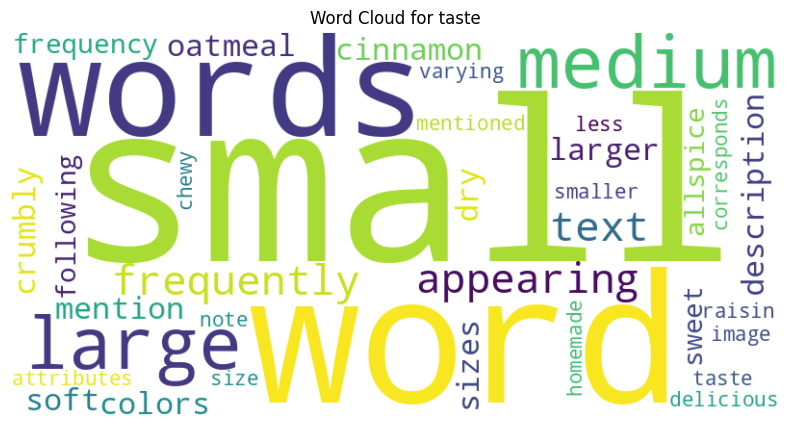

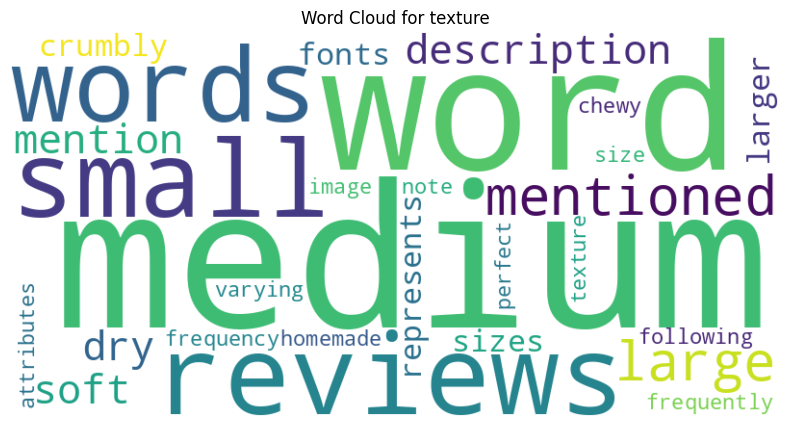

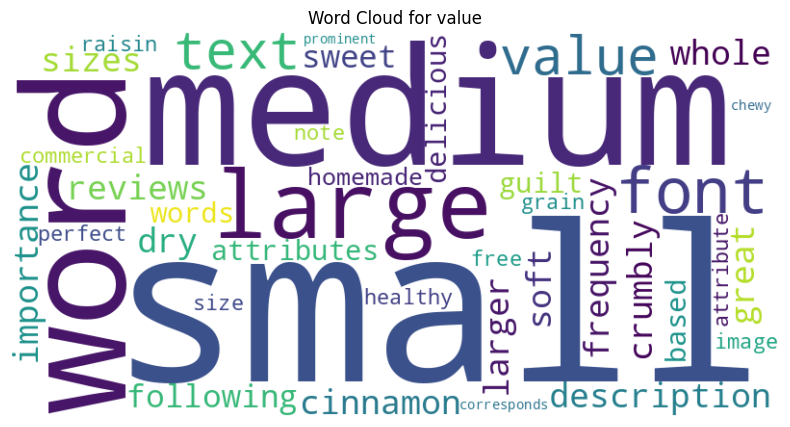

DataFrame for taste:
           Word  Count
0   description      1
1          soft      1
2           dry      1
3       mention      1
4        colors      1
5       crumbly      1
6       oatmeal      1
7      cinnamon      1
8        larger      1
9          word      3
10        sizes      1
11    frequency      1
12     allspice      1
13        small      5
14   frequently      2
15    following      1
16         text      2
17        sweet      1
18   attributes      1
19    delicious      1
20        words      3
21     homemade      1
22      smaller      1
23         size      1
24      varying      1
25    appearing      2
26       medium      3
27        taste      1
28         less      1
29        image      1
30        large      3
31    mentioned      1
32         note      1
33       raisin      1
34  corresponds      1
35        chewy      1

DataFrame for texture:
           Word  Count
0   description      1
1          soft      1
2           dry      1
3       ment

In [ ]:
!pip install pandas
import pandas as pd # Import the pandas library and alias it as 'pd'

# Attributes to generate word clouds for
attributes = ['taste', 'texture', 'value']

# Generate word clouds and log into DataFrame
word_cloud_data = {}
for attribute in attributes:
    word_cloud_data[attribute] = generate_word_cloud(attribute, raw_text)

# Create pandas DataFrame
dfs = {attribute: pd.DataFrame.from_dict(data, orient='index', columns=['Count']).reset_index().rename(columns={'index': 'Word'}) for attribute, data in word_cloud_data.items()}

# Display DataFrames
for attribute, df in dfs.items():
    print(f"DataFrame for {attribute}:")
    print(df)
    print()

# Convert DataFrames to JSON and log
json_data = {attribute: df.to_json() for attribute, df in dfs.items()}
print("JSON Data:")
print(json.dumps(json_data, indent=4))

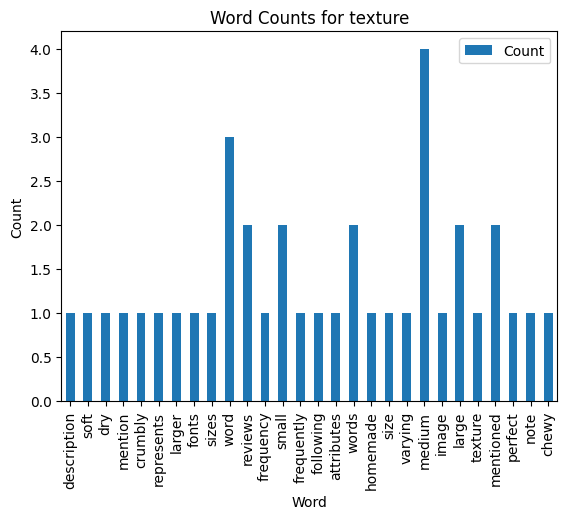

In [ ]:
# Load JSON data into DataFrame for taste
df_taste = pd.read_json(json_data['taste'], orient='index') # Access 'taste' data from json_data dictionary
df_taste = df_taste.transpose() # Transpose to get desired format

# Load JSON data into DataFrame for texture (add this section)
df_texture = pd.read_json(json_data['texture'], orient='index')
df_texture = df_texture.transpose()

import matplotlib.pyplot as plt # Import matplotlib for plotting

def visualize_dataframe(df, attribute): # Define the visualize_dataframe function
    # Plot the bar chart
    df.plot(x='Word', y='Count', kind='bar')
    plt.title(f'Word Counts for {attribute}')
    plt.xlabel('Word')
    plt.ylabel('Count')
    plt.show()

# Visualize DataFrame as chart for texture (change df_taste to df_texture)
visualize_dataframe(df_texture, 'texture') # Now you can call the function